### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

2023-02-01 21:28:56,684	INFO worker.py:1528 -- Started a local Ray instance.
(raylet) /Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/ray/dashboard/agent.py:50: DeprecationWarning: There is no current event loop
(raylet)   aiogrpc.init_grpc_aio()
(raylet) /Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/ray/dashboard/agent.py:468: DeprecationWarning: There is no current event loop
(raylet)   loop = asyncio.get_event_loop()


#### Train the network

In [2]:
n = 10
#device = torch.device('mps')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 12 (seed=1224895343, Wed Feb  1 21:28:57 2023)


In [3]:
trainer.train(2000, 'centered1')

         iter : 1
    mean_eval : -194.01809692382812
pop_best_eval : -10.47105884552002
  median_eval : -102.83112335205078
    best_eval : -10.47105884552002
   worst_eval : -663.922607421875

         iter : 2
    mean_eval : -114.55104064941406
pop_best_eval : -16.67047882080078
  median_eval : -186.75701904296875
    best_eval : -10.47105884552002
   worst_eval : -663.922607421875

         iter : 3
    mean_eval : -140.26217651367188
pop_best_eval : -14.39750862121582
  median_eval : -81.18557739257812
    best_eval : -10.47105884552002
   worst_eval : -663.922607421875

         iter : 4
    mean_eval : -120.54288482666016
pop_best_eval : -16.051889419555664
  median_eval : -81.27474975585938
    best_eval : -10.47105884552002
   worst_eval : -663.922607421875

         iter : 5
    mean_eval : -127.26969146728516
pop_best_eval : -9.470256805419922
  median_eval : -39.76516342163086
    best_eval : -9.470256805419922
   worst_eval : -663.922607421875

         iter : 6
    mean_

In [4]:
network = trainer.problem.parameterize_net(trainer.searcher.status['center'])

In [5]:
network = trainer.get_trained_network()

#### Visualize trained network

In [6]:
organism = generate_organism(50, device)
graph = organism.toGraph()
visualizer = Visualizer()

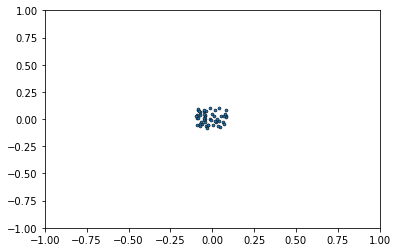

In [7]:
anim = visualizer.animate_organism(graph, network, frames=200)
IPython.display.HTML(anim)